<a href="https://colab.research.google.com/github/LatiefDataVisionary/sentiment-analysis-text-processing-bisa-ai/blob/main/notebook/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: Basic Text Processing for Sentiment Analysis**

- *Course: Basic Text Processing - Bisa AI*
- *Author: Lathif Ramadhan*
- *Date: 02/09/2025*

## **1. Project Initiation**

### **1.1. Introduction**

This project serves as the final assignment for the "Basic Text Processing" course from Bisa AI. The primary goal is to construct a comprehensive Google Colab notebook that meticulously demonstrates the end-to-end process of cleaning and preparing text data for a sentiment analysis task. Utilizing the "Sentiment Labelled Sentences Data Set" from Kaggle, which aggregates reviews from IMDb, Amazon, and Yelp, the notebook will walk through foundational text preprocessing techniques. The expected outcome is a clean, structured dataset ready for subsequent modeling phases, presented with a clear narrative flow suitable for a technical audience.

### **1.2. Project Objectives**

The specific objectives of this project are as follows:

*   **Data Loading:** Load the raw text data from multiple sources into a structured format.
*   **Exploratory Data Analysis (EDA):** Conduct initial analysis to understand the data's structure, content, and quality.
*   **Case Folding:** Convert all text to a consistent case (lowercase) to ensure uniformity.
*   **Removing Noise:** Eliminate irrelevant characters, numbers, and punctuation that do not contribute to sentiment.
*   **Filtering (Stopword Removal):** Remove common words (stopwords) that have little to no semantic value in sentiment analysis.
*   **Tokenizing:** Break down sentences into individual word units (tokens).
*   **Stemming:** Reduce words to their root form to standardize vocabulary.

### **1.3. Library Imports**

This section will cover the necessary library imports required for the project. It is a standard practice in data science workflows to consolidate all dependency imports at the beginning of the notebook. This improves code readability, organization, and ensures that all required packages are available before execution begins. We will primarily utilize libraries such as `pandas` for data manipulation, `nltk` for natural language processing tasks, and `re` for regular expressions.

In [243]:
import pandas as pd
import numpy as np
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK data
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

## **2. Data Loading and Consolidation**

### **2.1. Dataset Acquisition**

The dataset used in this project is the "Sentiment Labelled Sentences Data Set" available on Kaggle. This dataset is a compilation of text reviews and their corresponding sentiment labels (0 for negative, 1 for positive) from three distinct sources: IMDb (movie reviews), Amazon (product reviews), and Yelp (yelp reviews). The data is provided in simple text files, with each line containing a review sentence followed by a tab and its sentiment score.

In [244]:
# Download the dataset from Kaggle
# This will download the dataset to a local directory and return the path
path = kagglehub.dataset_download("marklvl/sentiment-labelled-sentences-data-set")

print("Path to dataset files:", path)

# we can optionally list the files in the downloaded directory to verify
print("\nFiles in the dataset directory:")
# Navigate into the actual data directory if there's a subdirectory
data_dir = os.path.join(path, "sentiment labelled sentences")
if os.path.exists(data_dir):
    for file in os.listdir(data_dir):
        print(file)
else:
    print("Could not find the 'sentiment labelled sentences' subdirectory.")

Path to dataset files: /kaggle/input/sentiment-labelled-sentences-data-set

Files in the dataset directory:
yelp_labelled.csv
amazon_cells_labelled.txt
imdb_labelled.txt
imdb_labelled.csv
readme.txt
sentiment labelled sentences
amazon_cells_labelled.csv
yelp_labelled.txt


### **2.2. Loading Individual Datasets**

In this step, we will load the three individual text files (`imdb_labelled.txt`, `amazon_cells_labelled.txt`, and `yelp_labelled.txt`) into separate Pandas DataFrames. Since these files are tab-separated and lack a header row, we will specify the separator as `\t` and set `header=None` during the loading process. We will also manually assign meaningful column names, such as 'sentence' for the text and 'sentiment' for the label, to enhance clarity and usability.

In [245]:
# Define the file names
file_names = ["yelp_labelled.txt", "amazon_cells_labelled.txt", "imdb_labelled.txt"]
dfs = {}

# Load each file into a pandas DataFrame
for file_name in file_names:
    file_path = os.path.join(path, "sentiment labelled sentences", file_name)
    # Assuming the files are tab-separated and have no header, assign column names
    df_name = file_name.replace("_labelled.txt", "") # Create a clean name for the dictionary key
    dfs[df_name] = pd.read_csv(file_path, sep="\t", header=None, names=["sentence", "sentiment"])

# Display the first few rows of each DataFrame to verify loading
for name, df in dfs.items():
    print(f"\nFirst 10 rows of {name} dataset:")
    display(df.head(10))


First 10 rows of yelp dataset:


,sentence,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1



First 10 rows of amazon_cells dataset:


,sentence,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0



First 10 rows of imdb dataset:


,sentence,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


### **2.3. Data Consolidation**

After loading the individual datasets, the next logical step is to consolidate them into a single, unified DataFrame. This strategic decision offers several advantages. Merging the datasets creates a larger and more diverse collection of sentiment-labelled sentences, which can lead to more robust analysis and potentially better performance in downstream modeling tasks. It also streamlines the subsequent text preprocessing steps, allowing us to apply transformations uniformly across all data points.

In [246]:
# Concatenate the dataframes into a single dataframe
# We use ignore_index=True to reset the index after concatenation
df = pd.concat(dfs.values(), ignore_index=True)
cleaned_df.to_csv("combined_sentiment_data.csv", index=False)


# Display the first few rows of the consolidated dataframe to verify
print("First 10 rows of the consolidated dataset:")
display(df.head(10))

# Display the shape of the consolidated dataframe
print("\nShape of the consolidated dataset:", df.shape)

First 10 rows of the consolidated dataset:


,sentence,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1



Shape of the consolidated dataset: (2748, 2)


## **3. Exploratory Data Analysis (EDA)**

### **3.1. Initial Data Inspection**

Following data consolidation, a crucial initial step is to perform a quick inspection of the combined dataset. We will use Pandas functions like `.head()` to view the first few rows, `.tail()` to examine the last few rows, and `.info()` to get a summary of the DataFrame, including the column data types and non-null counts. This helps us understand the basic structure and contents of the data we will be working with.

In [247]:
df.tail(10)

,sentence,sentiment
2738,"The opening sequence of this gem is a classic,...",1
2739,Fans of the genre will be in heaven.,1
2740,Lange had become a great actress.,1
2741,It looked like a wonderful story.,1
2742,I never walked out of a movie faster.,0
2743,I just got bored watching Jessice Lange take h...,0
2744,"Unfortunately, any virtue in this film's produ...",0
2745,"In a word, it is embarrassing.",0
2746,Exceptionally bad!,0
2747,All in all its an insult to one's intelligence...,0


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   2748 non-null   object
 1   sentiment  2748 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.1+ KB


### **3.2. Descriptive Statistics**

To gain deeper insights into both the textual and numerical aspects of our consolidated dataset, we will utilize the `.describe(include='all')` function. This provides key descriptive statistics. For the object (text) column, it will show the count, unique values, the top occurring value, and its frequency. For the numerical (sentiment) column, it will display count, mean, standard deviation, minimum, maximum, and quartile values, giving us a statistical overview of the sentiment distribution.

In [249]:
df.describe(include="all")

,sentence,sentiment
count,2748,2748.000000
unique,2731,NaN
top,If you like a loud buzzing to override all you...,NaN
freq,2,NaN
mean,NaN,0.504367
std,NaN,0.500072
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,1.000000
75%,NaN,1.000000


### **3.3. Data Quality Assessment**

Assessing the quality of the data is paramount before proceeding with preprocessing. In this section, we will focus on two primary checks: identifying missing values and detecting duplicate records. We will use `.isnull().sum()` to count any null entries across columns, ensuring there are no gaps in our data. Additionally, we will use `.duplicated().sum()` to find and quantify any exact duplicate rows, which may need to be addressed to avoid bias in analysis or modeling.

In [250]:
df.isnull().sum()

,0
sentence,0
sentiment,0


In [251]:
df.duplicated().sum()

np.int64(17)

In [252]:
df.drop_duplicates(inplace=True)

In [253]:
df.duplicated().sum()

np.int64(0)

### **3.4. Target Variable Distribution**

Understanding the distribution of the target variable (sentiment) is vital, especially for classification tasks. We will analyze how the sentiment labels (positive vs. negative) are distributed across the dataset. This helps us determine if the dataset is balanced or if there is a class imbalance that might need to be addressed later. Visualizations, such as a countplot, will be used to clearly illustrate the proportion of positive and negative sentiment examples.

In [254]:
# Count the occurrences of each sentiment label
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Calculate percentages
sentiment_counts['Percentage'] = (sentiment_counts['Count'] / sentiment_counts['Count'].sum()) * 100

print("Distribution of Sentiment Labels:")
display(round(sentiment_counts, 2))

Distribution of Sentiment Labels:


,Sentiment,Count,Percentage
0,1,1376,50.38
1,0,1355,49.62


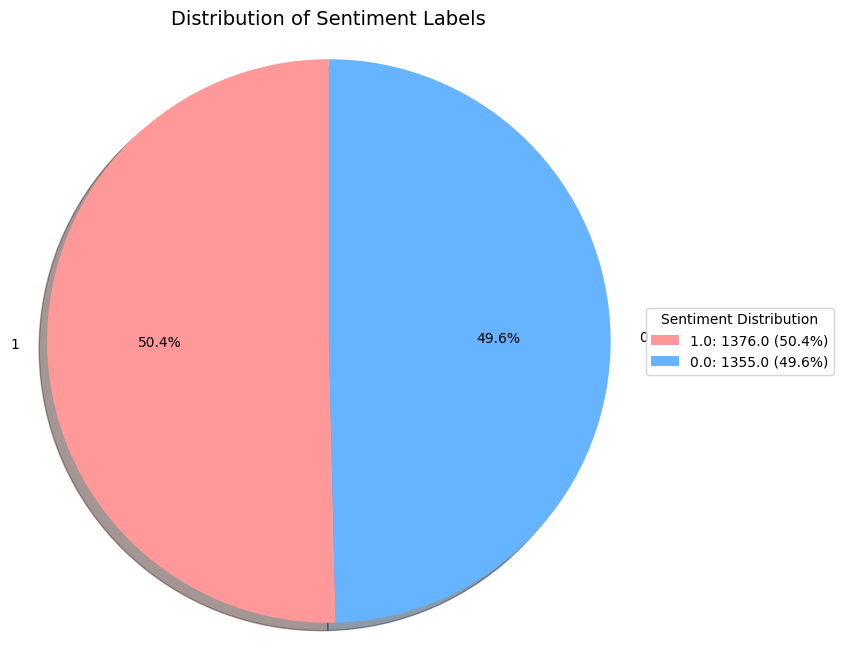

In [255]:
# Visualize the distribution using a pie chart with legend including count and percentage

# Ensure sentiment_counts is a DataFrame with 'Sentiment', 'Count', and 'Percentage' columns
if 'Percentage' in sentiment_counts.columns:
    # Create labels for the legend including Sentiment, Count, and Percentage
    legend_labels = [f"{row['Sentiment']}: {row['Count']} ({row['Percentage']:.1f}%)"
                     for index, row in sentiment_counts.iterrows()]
    # Use only Sentiment for slice labels, and autopct for percentage on slices
    slice_labels = sentiment_counts['Sentiment']
else:
     # Fallback if percentage wasn't calculated
     legend_labels = [f"{row['Sentiment']}: {row['Count']}"
                      for index, row in sentiment_counts.iterrows()]
     slice_labels = sentiment_counts['Sentiment']


plt.figure(figsize=(8, 8)) # Adjust figure size to accommodate legend
# Use slice_labels for the pie slices, autopct for percentage on slices
wedges, texts, autotexts = plt.pie(sentiment_counts['Count'], labels=slice_labels,
                                   autopct='%1.1f%%', startangle=90,
                                   colors=['#ff9999','#66b3ff'], shadow=True,
                                   textprops={'fontsize': 10}) # Text on the slices

plt.title('Distribution of Sentiment Labels', fontsize=14) # Adjust title fontsize
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend with custom labels
plt.legend(wedges, legend_labels,
           title="Sentiment Distribution",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1)) # Position legend outside the plot

plt.show()

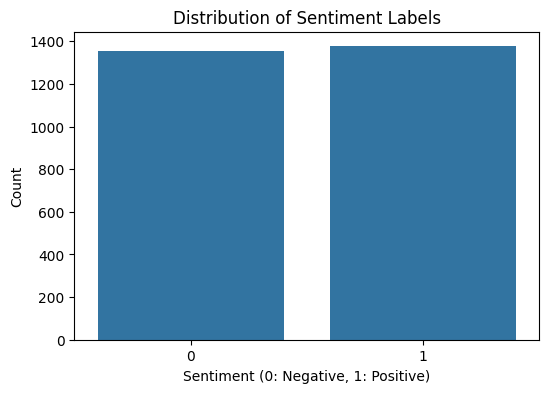

In [256]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0: Negative, 1: Positive)')
plt.ylabel('Count')
plt.show()

## **4. Text Preprocessing Pipeline**

### **4.1. Overview**

This chapter forms the core of the project, where we will construct and apply a comprehensive text preprocessing pipeline to the 'sentence' column of our consolidated DataFrame. Text preprocessing is a critical step in natural language processing that transforms raw text into a cleaner, more structured format suitable for analysis and machine learning models. We will apply a series of transformations sequentially to refine the text data.

### **4.2. Step 1: Case Folding**

Case folding is a fundamental step in text preprocessing where all characters in the text are converted to a uniform case, typically lowercase. This is important because it treats words like "Great", "GREAT", and "great" as the same token, preventing the model from considering variations in capitalization as distinct words. Applying case folding helps in reducing the vocabulary size and ensures consistency.

In [257]:
# Apply lowercase transformation to the 'sentence' column
df['sentence_cleaned'] = df['sentence'].str.lower()

# Display the first few rows to compare original and cleaned text
print("Before and After Case Folding:")
display(df[['sentence', 'sentence_cleaned']].head(10))

Before and After Case Folding:


,sentence,sentence_cleaned
0,Wow... Loved this place.,wow... loved this place.
1,Crust is not good.,crust is not good.
2,Not tasty and the texture was just nasty.,not tasty and the texture was just nasty.
3,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...
5,Now I am getting angry and I want my damn pho.,now i am getting angry and i want my damn pho.
6,Honeslty it didn't taste THAT fresh.),honeslty it didn't taste that fresh.)
7,The potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...
8,The fries were great too.,the fries were great too.
9,A great touch.,a great touch.


### **4.3. Step 2: Noise Removal (Punctuation, Numbers, etc.)**

Noise in text data includes characters or patterns that do not carry significant meaning and can interfere with analysis. This step involves removing elements such as punctuation marks, numbers, special symbols, and potentially extra whitespace using regular expressions. Eliminating this noise simplifies the text and focuses the data on the actual words that convey sentiment.

In [258]:
# Function to remove noise (punctuation, numbers, special characters)
def remove_noise(text):
  # Remove Punctuation
  text = re.sub(r'[^\w\s]', '', text)
  # Remove Numbers
  text = re.sub(r'\d+', '', text)
  # Remove extra whitespace
  tetx = re.sub(r'\s+', ' ', text).strip()
  return text

# Apply the noise removal function to the cleaned sentence column
df['sentence_cleaned'] = df['sentence_cleaned'].apply(remove_noise)

# Display the first few rows to see the effect of noise removal
print("After Noise Removal:")
display(df[['sentence', 'sentence_cleaned']].head(10))

After Noise Removal:


,sentence,sentence_cleaned
0,Wow... Loved this place.,wow loved this place
1,Crust is not good.,crust is not good
2,Not tasty and the texture was just nasty.,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,the selection on the menu was great and so wer...
5,Now I am getting angry and I want my damn pho.,now i am getting angry and i want my damn pho
6,Honeslty it didn't taste THAT fresh.),honeslty it didnt taste that fresh
7,The potatoes were like rubber and you could te...,the potatoes were like rubber and you could te...
8,The fries were great too.,the fries were great too
9,A great touch.,a great touch


### **4.4. Step 3: Filtering (Stopword Removal)**

Stopwords are common words in a language (e.g., "the", "a", "is", "in") that often do not contribute much to the overall meaning or sentiment of a sentence. Removing stopwords is a common practice to reduce the dimensionality of the data and focus on more informative terms. We will use a predefined list of English stopwords, likely from a library like NLTK, to filter out these words from our text data.

In [259]:
stop_words = set(nltk.corpus.stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stop_words])

# Apply the stopword removal function to the cleaned sentence column
df['sentence_cleaned'] = df['sentence_cleaned'].apply(remove_stopwords)

# Display the first few rows to see the effect of stopword removal
print("After Stopword Removal:")
display(df[['sentence', 'sentence_cleaned']].head(15))

After Stopword Removal:


,sentence,sentence_cleaned
0,Wow... Loved this place.,wow loved place
1,Crust is not good.,crust good
2,Not tasty and the texture was just nasty.,tasty texture nasty
3,Stopped by during the late May bank holiday of...,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,selection menu great prices
5,Now I am getting angry and I want my damn pho.,getting angry want damn pho
6,Honeslty it didn't taste THAT fresh.),honeslty didnt taste fresh
7,The potatoes were like rubber and you could te...,potatoes like rubber could tell made ahead tim...
8,The fries were great too.,fries great
9,A great touch.,great touch


### **4.5. Step 4: Tokenizing**

Tokenization is the process of breaking down a continuous stream of text into smaller units called tokens. These tokens are typically individual words, but can also be phrases or other meaningful elements depending on the tokenizer used. This step is essential as most NLP tasks operate on tokens rather than raw text. We will convert each sentence into a list of its constituent words.

In [260]:
# Function to tokenize text using split()
def tokenize_text(text):
    # Ensure text is treated as a string and handle potential non-string inputs gracefully
    if not isinstance(text, str):
        return [] # Return empty list for non-string inputs
    return text.split()

# Apply the tokenization function to the cleaned sentence column
df['sentence_tokenized'] = df['sentence_cleaned'].apply(tokenize_text)

# Display the first few rows to see the effect of tokenization
print("After Tokenization:")
display(df[['sentence_cleaned', 'sentence_tokenized']].head(10))

After Tokenization:


,sentence_cleaned,sentence_tokenized
0,wow loved place,"[wow, loved, place]"
1,crust good,"[crust, good]"
2,tasty texture nasty,"[tasty, texture, nasty]"
3,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev..."
4,selection menu great prices,"[selection, menu, great, prices]"
5,getting angry want damn pho,"[getting, angry, want, damn, pho]"
6,honeslty didnt taste fresh,"[honeslty, didnt, taste, fresh]"
7,potatoes like rubber could tell made ahead tim...,"[potatoes, like, rubber, could, tell, made, ah..."
8,fries great,"[fries, great]"
9,great touch,"[great, touch]"


### **4.6. Step 5: Stemming**

Stemming is a technique used to reduce words to their root or base form, often by removing suffixes. For example, the words "running", "runs", and "ran" might all be reduced to the stem "run". The goal of stemming is to group together words with similar meanings but different inflections, helping to reduce the vocabulary size and standardize terms. We will apply a stemming algorithm, such as the Porter Stemmer from NLTK, to our tokens.

In [261]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Function to apply stemming to a list of tokens
def stem_tokens(tokens):
    # Ensure input is a list of strings before stemming
    if not isinstance(tokens, list):
        return []
    return [stemmer.stem(str(token)) for token in tokens]

# Apply the stemming function to the tokenized sentence column
# We apply it to the 'sentence_tokenized' column which contains lists of tokens
df['sentence_stemmed'] = df['sentence_tokenized'].apply(stem_tokens)

# Display the first few rows to see the effect of stemming
print("After Stemming:")
display(df[['sentence_tokenized', 'sentence_stemmed']].head(10))

After Stemming:


,sentence_tokenized,sentence_stemmed
0,"[wow, loved, place]","[wow, love, place]"
1,"[crust, good]","[crust, good]"
2,"[tasty, texture, nasty]","[tasti, textur, nasti]"
3,"[stopped, late, may, bank, holiday, rick, stev...","[stop, late, may, bank, holiday, rick, steve, ..."
4,"[selection, menu, great, prices]","[select, menu, great, price]"
5,"[getting, angry, want, damn, pho]","[get, angri, want, damn, pho]"
6,"[honeslty, didnt, taste, fresh]","[honeslti, didnt, tast, fresh]"
7,"[potatoes, like, rubber, could, tell, made, ah...","[potato, like, rubber, could, tell, made, ahea..."
8,"[fries, great]","[fri, great]"
9,"[great, touch]","[great, touch]"


## **5. Post-Processing and Finalization**

### **5.1. Before-and-After Comparison**

To visually demonstrate the impact of the preprocessing pipeline, we will present a side-by-side comparison of the original 'sentence' column and the newly created, fully processed text column. This comparison will clearly show the removal of noise, case uniformity, stopword elimination, tokenization into lists, and stemming, highlighting the transformation the data has undergone and the effectiveness of each step in the pipeline.

In [262]:
print("Before and After Preprocessing Comparison:")
display(df[['sentence', 'sentence_cleaned', 'sentence_tokenized', 'sentence_stemmed']].head(10))

Before and After Preprocessing Comparison:


,sentence,sentence_cleaned,sentence_tokenized,sentence_stemmed
0,Wow... Loved this place.,wow loved place,"[wow, loved, place]","[wow, love, place]"
1,Crust is not good.,crust good,"[crust, good]","[crust, good]"
2,Not tasty and the texture was just nasty.,tasty texture nasty,"[tasty, texture, nasty]","[tasti, textur, nasti]"
3,Stopped by during the late May bank holiday of...,stopped late may bank holiday rick steve recom...,"[stopped, late, may, bank, holiday, rick, stev...","[stop, late, may, bank, holiday, rick, steve, ..."
4,The selection on the menu was great and so wer...,selection menu great prices,"[selection, menu, great, prices]","[select, menu, great, price]"
5,Now I am getting angry and I want my damn pho.,getting angry want damn pho,"[getting, angry, want, damn, pho]","[get, angri, want, damn, pho]"
6,Honeslty it didn't taste THAT fresh.),honeslty didnt taste fresh,"[honeslty, didnt, taste, fresh]","[honeslti, didnt, tast, fresh]"
7,The potatoes were like rubber and you could te...,potatoes like rubber could tell made ahead tim...,"[potatoes, like, rubber, could, tell, made, ah...","[potato, like, rubber, could, tell, made, ahea..."
8,The fries were great too.,fries great,"[fries, great]","[fri, great]"
9,A great touch.,great touch,"[great, touch]","[great, touch]"


### **5.2. Exporting the Cleaned Dataset**

The final step in the data preparation phase is to save the cleaned and processed DataFrame to a new file. This allows the ready-to-use dataset to be easily accessed for subsequent stages of the project, such as feature extraction and model building, without needing to re-run the entire preprocessing pipeline each time. We will export the DataFrame to a CSV file for portability and ease of use.

In [263]:
# Select the relevant columns for the final cleaned dataset
# We'll include the original sentiment label and the stemmed tokens
cleaned_df = df[['sentiment', 'sentence_stemmed']].copy()

# Optionally, we might want to join the stemmed tokens back into a string for some applications
cleaned_df['sentence_stemmed_str'] = cleaned_df['sentence_stemmed'].apply(lambda x: ' '.join(x))

# Display the first few rows of the cleaned dataframe to verify
print("\nFirst 10 rows of the cleaned dataset ready for export:")
display(cleaned_df.head(10))

# Define the output file path
output_path = "sentiment_labelled_sentences_cleaned.csv"

# Export the cleaned dataframe to a CSV file
# We set index=False to avoid writing the DataFrame index as a column in the CSV
cleaned_df.to_csv(output_path, index=False)

print(f"\nCleaned dataset exported successfully to '{output_path}'")


First 10 rows of the cleaned dataset ready for export:


,sentiment,sentence_stemmed,sentence_stemmed_str
0,1,"[wow, love, place]",wow love place
1,0,"[crust, good]",crust good
2,0,"[tasti, textur, nasti]",tasti textur nasti
3,1,"[stop, late, may, bank, holiday, rick, steve, ...",stop late may bank holiday rick steve recommen...
4,1,"[select, menu, great, price]",select menu great price
5,0,"[get, angri, want, damn, pho]",get angri want damn pho
6,0,"[honeslti, didnt, tast, fresh]",honeslti didnt tast fresh
7,0,"[potato, like, rubber, could, tell, made, ahea...",potato like rubber could tell made ahead time ...
8,1,"[fri, great]",fri great
9,1,"[great, touch]",great touch



Cleaned dataset exported successfully to 'sentiment_labelled_sentences_cleaned.csv'


## **6. Conclusion and Future Work**

### **6.1. Summary of Achievements**

This project successfully demonstrated the fundamental steps involved in text preprocessing for sentiment analysis using the "Sentiment Labelled Sentences Data Set". We covered data loading, consolidation, exploratory data analysis, and built a robust text cleaning pipeline encompassing case folding, noise removal, stopword filtering, tokenization, and stemming. The outcome is a well-structured and cleaned dataset prepared for further analysis and model training.

### **6.2. Next Steps**

With the text data now cleaned and preprocessed, the natural progression for this project involves moving towards building and evaluating sentiment analysis models. Potential next steps include:

*   **Feature Engineering:** Transforming the cleaned text data into numerical features suitable for machine learning models using techniques like TF-IDF or Word2Vec.
*   **Model Building:** Selecting and implementing various classification algorithms (e.g., Naive Bayes, Support Vector Machines, or deep learning models) for sentiment prediction.
*   **Model Evaluation:** Assessing the performance of the trained models using appropriate metrics and fine-tuning them for optimal results.